<a href="https://colab.research.google.com/github/dev02chandan/recommendation-systems/blob/main/Music%20Recommendation%20System%20using%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music recommender system

One of the most used machine learning algorithms is recommendation systems. A **recommender** (or recommendation) **system** (or engine) is a filtering system which aim is to predict a rating or preference a user would give to an item, eg. a film, a product, a song, etc.

Which type of recommender can we have?   

There are two main types of recommender systems:
- Content-based filters
- Collaborative filters
  
> Content-based filters predicts what a user likes based on what that particular user has liked in the past. On the other hand, collaborative-based filters predict what a user like based on what other users, that are similar to that particular user, have liked.

We have previously developed a content-based recommendation system. Now, we'll look into collaborative filtering.

### 2) Collaborative filters

Collaborative Filters work with an interaction matrix, also called rating matrix. The aim of this algorithm is to learn a function that can predict if a user will benefit from an item - meaning the user will likely buy, listen to, watch this item.

Among collaborative-based systems, we can encounter two types: **user-item** filtering and **item-item** filtering.

*What algorithms do collaborative filters use to recommend new songs?* There are several machine learning algorithms that can be used in the case of collaborative filtering. Among them, we can mention nearest-neighbor, clustering, and matrix factorization.

**K-Nearest Neighbors (kNN)** is considered the standard method when it comes to both user-based and item-based collaborative filtering approaches.
  
We'll go through the steps for generating a music recommender system using a k-nearest algorithm approach.

### Importing required libraries

First, we'll import all the required libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from scipy.sparse import csr_matrix

### Reading the files

We are going to use the **[Million Song Dataset](http://millionsongdataset.com/)**, a freely-available collection of audio features and metadata for a million contemporary popular music tracks.

There are two files that will be interesting for us. The first of them will give us information about the songs. Particularly, it contains the user ID, song ID and the listen count. On the other hand, the second file will contain song ID, title of that song, release, artist name and year.
We need to merge these two DataFrames. For that aim, we'll use the `song_ID`

In [5]:
#Read userid-songid-listen_count
song_info = pd.read_csv('/content/drive/MyDrive/RS/510000.txt',sep='\t',header=None)
song_info.columns = ['user_id', 'song_id', 'listen_count']

#Read song  metadata
song_actual =  pd.read_csv('/content/drive/MyDrive/RS/5song_data.csv')
song_actual.drop_duplicates(['song_id'], inplace=True)

#Merge the two dataframes above to create input dataframe for recommender systems


In [6]:
song_info

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [7]:
song_actual

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [8]:
df = pd.merge(song_info, song_actual, on='song_id')

In [9]:
df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


#Get information about dataset attributes.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
 3   title         object
 4   release       object
 5   artist_name   object
 6   year          int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


In [11]:
len(df['song_id'].unique())

10000

In [12]:
df.nunique()

user_id         76353
song_id         10000
listen_count      295
title            9567
release          5388
artist_name      3375
year               58
dtype: int64

In [13]:
df.describe()

,listen_count,year
count,2.000000e+06,2.000000e+06
mean,3.045485e+00,1.628645e+03
std,6.579720e+00,7.787283e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.984000e+03
50%,1.000000e+00,2.002000e+03
75%,3.000000e+00,2.007000e+03
max,2.213000e+03,2.010000e+03


#Save the dataset into a csv file

In [14]:
df.to_csv('5entireDataset.csv', index=False)

We'll save this dataset into a `csv file` so we have this available if there is any other recommendation system project we want to do.

#Read this file into a new **DataFrame** `df_songs`.

In [15]:
df_songs = pd.read_csv('5entireDataset.csv')

## Exploring the data

#Inspect the first rows of `DataFrame`.

In [16]:
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


#check how many observions there are in the dataset.

In [17]:
#Get total observations
print(f"There are {df_songs.shape[0]} observations in the dataset")

There are 2000000 observations in the dataset


#Check for missing values and get the count

In [18]:
df_songs.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

#explore some characteristics of the dataset:

- Unique songs:

In [19]:
#Unique songs
unique_songs = df_songs['song_id'].nunique()
unique_songs

10000

In [20]:
unique_songs_titles = df_songs['title'].nunique()
unique_songs_titles

9567

- Unique artists:

In [21]:
#Unique artists
unique_artists = df_songs['artist_name'].nunique()
unique_artists

3375

- Unique users:

In [22]:
#Unique users
unique_users = df_songs['user_id'].nunique()
unique_users

76353

#Explore the popularity of songs and artists.

### Most popular songs

How do we determine which are the most popular songs? For this task, we'll count how many times each song appears. Note that while we are using  `listen_count`, we only care about the number of rows, we don't consider the number present in that row. This number represents how many times one user listen to the same song.

In [23]:
#count how many rows we have by song, we show only the ten more popular songs
song_counts = df_songs['song_id'].value_counts()

In [24]:
song_counts

SOFRQTD12A81C233C0    8277
SOAUWYT12A81C206F1    7032
SOAXGDH12A8C13F8A1    6949
SOBONKR12A58A7A7E0    6412
SOSXLTC12AF72A7F54    6145
                      ... 
SOLIGVL12AB017DBAE      51
SOWNLZF12A58A79811      51
SOBPGWB12A6D4F7EF3      50
SOGSPGJ12A8C134FAA      48
SOYYBJJ12AB017E9FD      48
Name: song_id, Length: 10000, dtype: int64

In [25]:
most_popular_songs = song_counts.index[:10]
most_popular_songs

Index(['SOFRQTD12A81C233C0', 'SOAUWYT12A81C206F1', 'SOAXGDH12A8C13F8A1',
       'SOBONKR12A58A7A7E0', 'SOSXLTC12AF72A7F54', 'SONYKOW12AB01849C9',
       'SOEGIYH12A6D4FC0E3', 'SOLFXKT12AB017E3E0', 'SODJWHY12A8C142CCE',
       'SOFLJQZ12A6D4FADA6'],
      dtype='object')

In [26]:
type(most_popular_songs )

pandas.core.indexes.base.Index

In [27]:
counts = []
song_titles = []

for song_id in most_popular_songs:
    counts.append(song_counts[song_id])
    song_title = df_songs.loc[df_songs['song_id'] == song_id, 'title'].values[0]
    song_titles.append(song_title)

print("counts:", counts)
print("titles:", song_titles)


counts: [8277, 7032, 6949, 6412, 6145, 5841, 5385, 4795, 4758, 4548]
titles: ['Sehr kosmisch', 'Undo', 'Dog Days Are Over (Radio Edit)', "You're The One", 'Revelry', 'Secrets', 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)', 'Fireflies', 'Hey_ Soul Sister', 'Tive Sim']


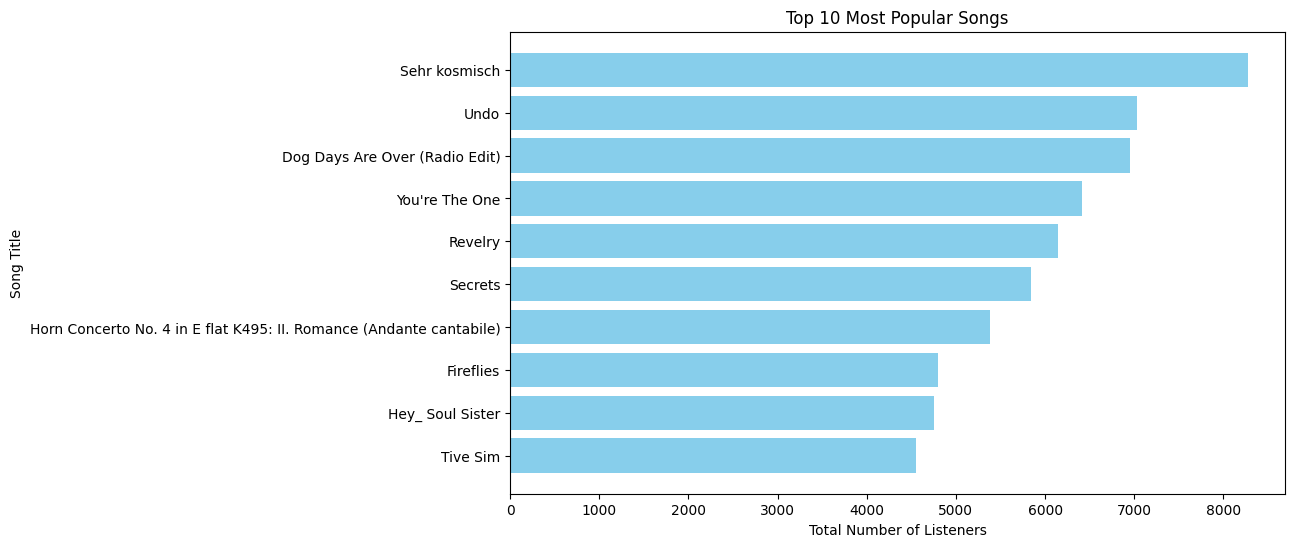

In [28]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(song_titles, counts, color='skyblue')
plt.xlabel('Total Number of Listeners')
plt.ylabel('Song Title')
plt.title('Top 10 Most Popular Songs')
plt.gca().invert_yaxis()  # Invert the y-axis for the bar chart
plt.show()

In [29]:
colors = plt.cm.viridis(np.linspace(1, 0,len(song_titles)))

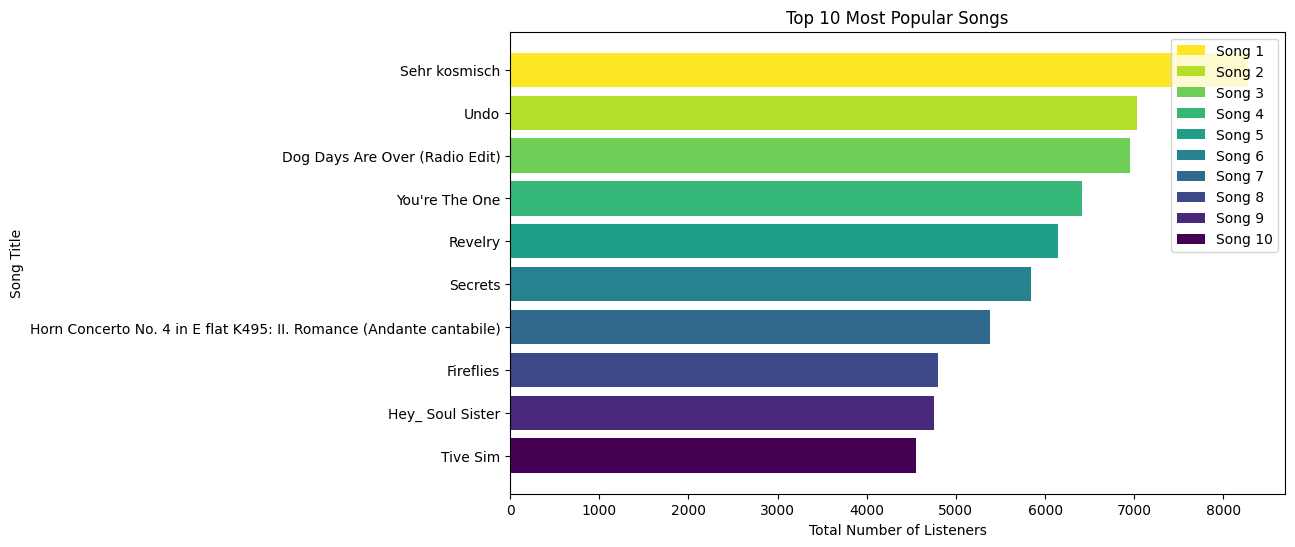

In [30]:
# Create a horizontal bar chart with different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(song_titles, counts, color=colors)
plt.xlabel('Total Number of Listeners')
plt.ylabel('Song Title')
plt.title('Top 10 Most Popular Songs')
plt.gca().invert_yaxis()  # Invert the y-axis for the bar chart

# Add a color legend for the bars
color_labels = [f'Song {i+1}' for i in range(len(song_titles))]
plt.legend(bars, color_labels, loc='upper right')

plt.show()

### Most popular artist

For the next task, we'll count how many times each artist appears. Again, we'll count how many times the same artist appears.

In [31]:
#count how many rows we have by artist name, we show only the ten more popular artist
ten_pop_artists  = df_songs.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'],
                                                                                                ascending = [0,1])

In [32]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,artist_name,listen_count
649,Coldplay,29422
2850,The Black Keys,19862
1651,Kings Of Leon,18747
1107,Florence + The Machine,18112
1370,Jack Johnson,17801
2946,The Killers,16063
2374,Radiohead,14890
736,Daft Punk,14715
2073,Muse,14005
1554,Justin Bieber,13959


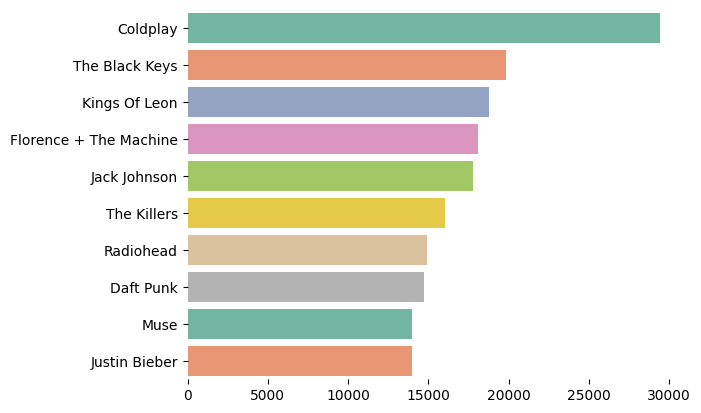

In [33]:
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

### Listen count by user

We can also get some other information from the feature `listen_count`. We will answer the following questions:

**What was the maximum time the same user listen to a same song?**

In [34]:
max(df_songs['listen_count'])

2213

In [35]:
"The maximum time the same user listened to the same songs was: " + str(max(df_songs['listen_count']))

'The maximum time the same user listened to the same songs was: 2213'

**How many times on average the same user listen to a same song?**

In [36]:
sum(df_songs['listen_count'])/len(df_songs)

3.0454845

In [37]:
"On average, a user listen to the same song " + str(sum(df_songs['listen_count'])/len(df_songs))

'On average, a user listen to the same song 3.0454845'

We can also check the distribution of `listen_count`:

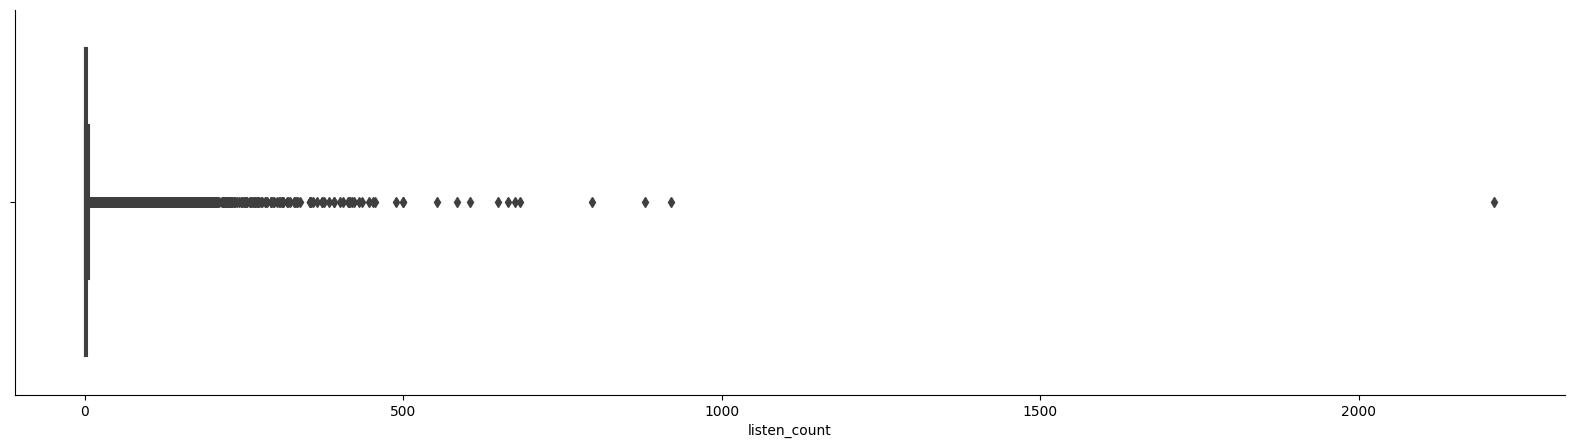

In [38]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='listen_count', data=df_songs)
sns.despine()

**What are the most frequent number of times a user listens to the same song?**

In [39]:
listen_counts = df_songs.groupby(['user_id', 'song_id']).size().reset_index(name='listen_count')

most_frequent_count = listen_counts['listen_count'].mode().values[0]

print("Most frequent number of listens to the same song:", most_frequent_count)

Most frequent number of listens to the same song: 1


In [40]:
# Group the DataFrame by listen_count and count the occurrences
listen_count_counts = df_songs['listen_count'].value_counts().reset_index()

# Rename the columns for clarity
listen_count_counts.columns = ['listen_count', 'counts']

# Sort the DataFrame by listen_count in ascending order (optional)
listen_count_counts = listen_count_counts.sort_values(by='listen_count')

# Display the resulting DataFrame
print(listen_count_counts)

     listen_count   counts
0               1  1138433
1               2   313043
2               3   142933
4               4    82569
3               5    93136
..            ...      ...
268           683        1
233           796        1
284           879        1
294           920        1
236          2213        1

[295 rows x 2 columns]


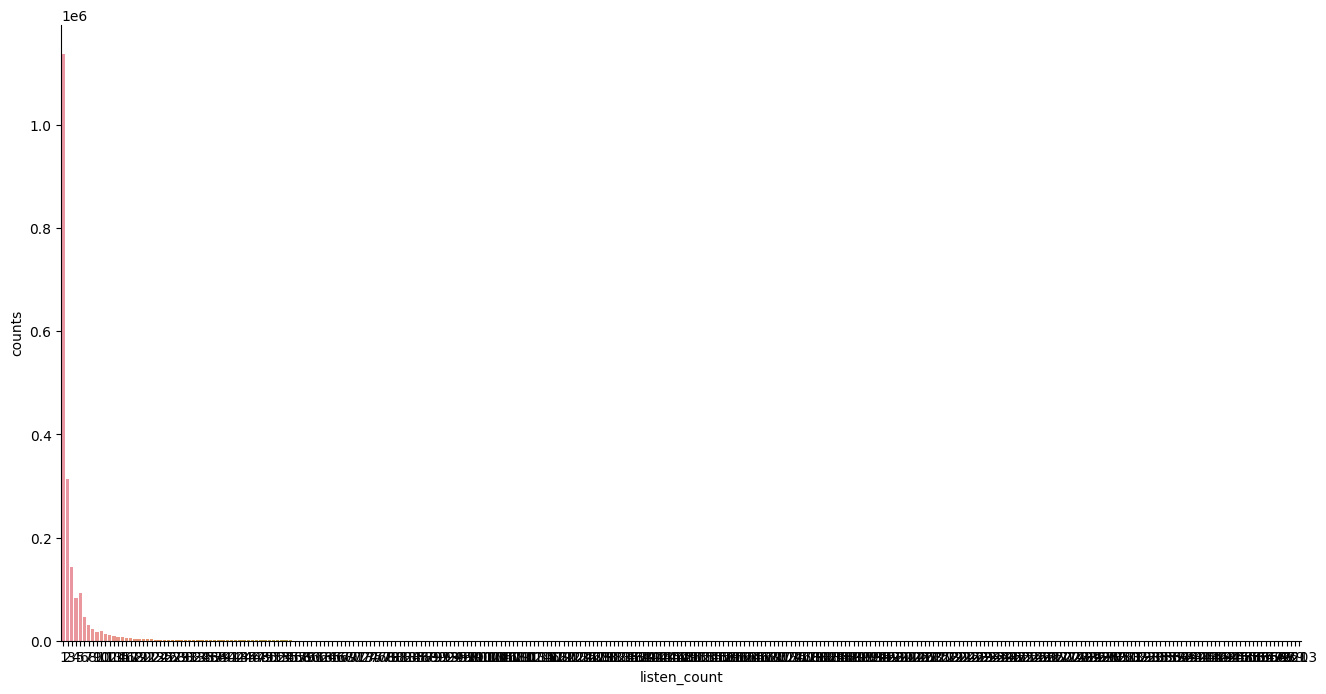

In [41]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='counts', data=listen_count_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

**How many songs does a user listen in average?**

In [42]:
song_user = df_songs.groupby('user_id')['song_id'].count()

In [43]:
song_user

user_id
00003a4459f33b92906be11abe0e93efc423c0ff     7
00005c6177188f12fb5e2e82cdbd93e8a3f35e64     5
00030033e3a2f904a48ec1dd53019c9969b6ef1f     9
0007235c769e610e3d339a17818a5708e41008d9    10
0007c0e74728ca9ef0fe4eb7f75732e8026a278b     9
                                            ..
fffce9c1537fbc350ea68823d956eaa8f5236dbe    44
fffd6a2bdef646ce9898b628d5dd56c43df69a9d    11
fffd9635b33f412de8ed02e44e6564e3644cf3c6    17
fffe6d1d8500f1c1f31bd63abce35c0f975a86bf     7
fffea3d509760c984e7d40789804c0e5e289cc86    23
Name: song_id, Length: 76353, dtype: int64

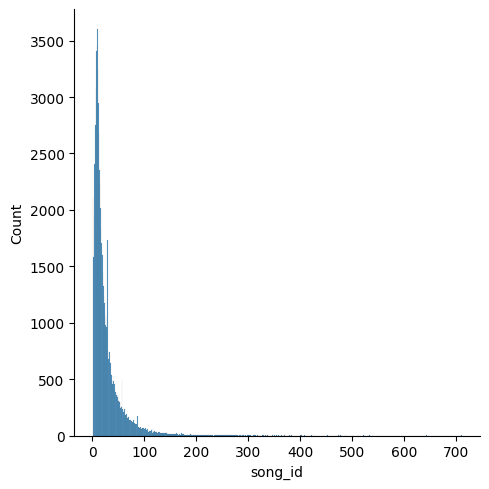

In [44]:
sns.displot(song_user)

In [45]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 26.194124657839247 songs


In [46]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 16.0 songs, with minimum 1 and maximum 711 songs


We can see that a user listens in average to 27 songs. Even the maximum amount of songs listen by an user is 711, and we have 9567 songs in our dataset.

So, not all user listen to all songs, so a lot of values in the `song x users` matrix are going to be zero. Thus, we’ll be dealing with extremely sparse data.

*How sparse?* Let's check that:

In [47]:
# Get how many values should it be if all songs have been listen by all users
values_matrix = unique_users * unique_songs

In [48]:
# Substract the total values with the actural shape of the DataFrame songs
zero_values_matrix = values_matrix - df_songs.shape[0]

In [49]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 761530000 values that are zero


Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make our life easier, let's just select all those users that have listened to at least 16 songs.

### Prepare the data

In [50]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()

In [51]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = df_songs[df_songs['user_id'].isin(song_ten_id)].reset_index(drop=True)

We need now to work with a `scipy-sparse matrix` to avoid overflow and wasted memory. For that purpose, we'll use the `csr_matrix` function from `scipy.sparse`.

In [52]:
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

Let's take a look at the table `user x song`.

In [53]:
df_songs_features.head()

user_id,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,001322829b5dc3edc59bf78189617ddd8f23c82a,00185e316f07f0f00c325ca034be59c15b362401,0019740e3e8c24e223a6f88e3faa7c144ec5a014,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,...,fff300cd094fe04030b79fae550dc9d065190182,fff4676dacb2e9a7217702f62ee70e88aa512ecc,fff4e1a7dacbe9c13051c08f09bf66d76cbee35e,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffea3d509760c984e7d40789804c0e5e289cc86
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACSG12AB018DC80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAEJI12AB0188AB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFAC12A67ADF7EB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because the system will output the id of the song, instead of the title, we'll make a function that maps those indices with the song title.

In [54]:
df_unique_songs = df_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [55]:
decode_id_song = {
    song: i for i, song in
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].title))
}

### Model and recommendations

So, we know that we want to use the model to predict songs. For that, we'll use the `Recommender` class wrote in the `knn_recommender` file.

In [56]:
from sklearn.neighbors import NearestNeighbors
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
import numpy as np

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [57]:
class Recommender:
    def __init__(self, metric, algorithm, k, data, decode_id_song):
        self.metric = metric
        self.algorithm = algorithm
        self.k = k
        self.data = data
        self.decode_id_song = decode_id_song
        self.data = data
        self.model = self._recommender().fit(data)

    def make_recommendation(self, new_song, n_recommendations):
        recommended = self._recommend(new_song=new_song, n_recommendations=n_recommendations)
        print("... Done")
        return recommended

    def _recommender(self):
        return NearestNeighbors(metric=self.metric, algorithm=self.algorithm, n_neighbors=self.k, n_jobs=-1)

    def _recommend(self, new_song, n_recommendations):
        # Get the id of the recommended songs
        recommendations = []
        recommendation_ids = self._get_recommendations(new_song=new_song, n_recommendations=n_recommendations)
        # return the name of the song using a mapping dictionary
        recommendations_map = self._map_indeces_to_song_title(recommendation_ids)
        # Translate this recommendations into the ranking of song titles recommended
        for i, (idx, dist) in enumerate(recommendation_ids):
            recommendations.append(recommendations_map[idx])
        return recommendations

    def _get_recommendations(self, new_song, n_recommendations):
        # Get the id of the song according to the text
        recom_song_id = self._fuzzy_matching(song=new_song)
        # Start the recommendation process
        print(f"Starting the recommendation process for {new_song} ...")
        # Return the n neighbors for the song id
        distances, indices = self.model.kneighbors(self.data[recom_song_id], n_neighbors=n_recommendations+1)
        return sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]


    def _map_indeces_to_song_title(self, recommendation_ids):
        # get reverse mapper
        return {song_id: song_title for song_title, song_id in self.decode_id_song.items()}

    def _fuzzy_matching(self, song):
        match_tuple = []
        # get match
        for title, idx in self.decode_id_song.items():
            ratio = fuzz.ratio(title.lower(), song.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print(f"The recommendation system could not find a match for {song}")
            return
        return match_tuple[0][1]

**Note:** Since the data size is very big, while creating a user-item matrix, the ram is not sufficient. Hence we will truncate the data to listen_count_threshold.

In [58]:
# Define a threshold for listen counts
listen_count_threshold = 20

# Filter the DataFrame to keep only rows with listen counts above the threshold
filtered_df_songs = df_songs[df_songs['listen_count'] > listen_count_threshold]

In [59]:
metric = 'cosine'
algorithm = 'brute'
k = 10
data = mat_songs_features
decode_id_song = decode_id_song

model = Recommender(metric=metric, algorithm=algorithm, k=k, data=data, decode_id_song=decode_id_song)


In [60]:
song = 'No One Could Ever'

In [61]:
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for No One Could Ever ...
... Done


In [62]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")

The recommendations for No One Could Ever are:
['Nightlite (Zero dB Reconstruction - Radio Edit)', 'Believe In Me (A&T Remix)', 'Dinosaurs', 'Kota', 'Black Sands', 'The Keeper', 'Kong', 'Eyesdown', 'Stay The Same', 'All In Forms']


## Conclusion

In this notebook, we successfully built a music recommendation system using collaborative filtering and the K-Nearest Neighbors (KNN) algorithm. To manage computational resources, the dataset was downscaled by selecting a random subset of users and songs. The user-item interaction matrix was then used to train the KNN model, which is now capable of making song recommendations based on user listening history. This approach offers a simple yet effective way to provide personalized music recommendations.

Source: [Original Creator Notebook](https://github.com/ugis22/music_recommender/blob/master/collaborative_recommender_system/CF_knn_music_recommender.ipynb)